<a href="https://colab.research.google.com/github/Yeaaaaaaah/DeepLearning/blob/main/Yeaaaaaaah/ch09_DL_02_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 구현하기

## 인공 신경망 (ANN)
artificial neural network, ANN

* 인간의 신경계의 작동 방식에서 영감을 받음
    * 자극 → (감각 기관) → (신경 세포 1) → (신경 세포 2) → ... 
* 입력층 input layer : 자극을 입력받는 감각기관에 해당
* 은닉층 hidden layer (혹은 중간층) : 입력층을 거친 자극이 지나가는 곳
* 출력층 output layer : 마지막으로 전달되는 뉴런
* 각 층에 존재하는 한 단위의 인공 뉴런을 노드 node 라고 함
![인공신경망](https://github.com/BigData23th/Data/raw/main/dl_01_03.jpg)

* 인공 신경망의 각 노드는 입력된 자극에 특정한 수학 연산을 실행
* 각 층에 존재하는 매개변수인 가중치 weight 에 행렬곱시키고 편향 bias 를 더해줌
    * **가중치** : 입력 신호가 출력에 주는 영향을 계산하는 매개변수
    * **편향** : 각 노드가 얼마나 데이터에 민감한지 알려주는 매개변수
* 이 행렬곱의 결과는 활성화 함수 activation function 을 거쳐 인공뉴런의 결괏값을 산출하게 됨
    * **활성화 함수** : 입력에 적절한 처리를 해서 출력 신호로 변환하는 함수
    * 입력 신호의 합이 활성화를 일으키는지 아닌지(얼마나 출력할지)를 정하는 역할

![가중치, 편향, 활성화 함수](https://github.com/BigData23th/Data/raw/main/dl_01_04.jpg)

* 노드를 통해 나온 결괏값은 이어지는 은닉층의 인공뉴런으로 전달되고, 가중치 곱 & 활성화 함수를 거치게 됨

> 이러한 뉴런 간의 자극 처리와 전달 과정을 몇 겹에 걸쳐 반복한 후 마지막 출력층에서 결괏값을 만들어내는 것

* 인공 신경망의 출력층이 낸 결괏값과 정답을 비교해 오차를 계산해야 함
* 이 오차를 기반으로 신경망 전체를 학습시키려면 출력층이 가중치부터 입력층의 가중치까지 모두 경사하강법을 활용해 변경해줘야 함
* 이렇게 겹겹이 쌓인 가중치를 뒤에서부터 차례대로 조정하고 최적화하는 알고리즘 = 역전파 Backpropagation 알고리즘 (오차역전파)
---
* https://youtu.be/p9M0A1VBUpM
* https://youtu.be/1Q_etC_GHHk
* https://youtu.be/573EZkzfnZ0

# 간단한 분류 모델 구현

In [1]:
# 신경망의 학습과 평가에 사용할 데이터셋 만들기
from sklearn.datasets import make_blobs
# make_blobs() : 데이터를 2차원 벡터 형태로 만든 데이터셋을 생성

In [2]:
n_dim = 2 # 차원
# 좌표값 / 분류.라벨.정답값
# Train
x_train, y_train = make_blobs(
    random_state=100,
    n_samples=80, # 추출할(생성할) 샘플(데이터) 갯수
    n_features=n_dim, # 차원의 수 (특성 갯수)
    centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], # 중심점들 (예시 : 4개)
    shuffle=True,
    cluster_std=0.3 # 중심점으로부터 얼마나 퍼져있을 건지 (표준편차)
)
# → 인덱스를 생성해주는 함수. (0, 1, 2, 3)
# → 각 데이터 한 점 한 점이 몇 번째 클러스터에 속해 있는지 알려주는 인덱스
# x (좌표), y(인덱스->몇번째 클러스터에 속해있는지)
# Test
x_test, y_test = make_blobs(
    random_state=100,
    n_samples=20, # 추출할(생성할) 샘플(데이터) 갯수
    n_features=n_dim, # 차원의 수 (특성 갯수)
    centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], # 중심점들 (예시 : 4개)
    shuffle=True,
    cluster_std=0.3 # 중심점으로부터 얼마나 퍼져있을 건지 (표준편차)
)
# 훈련 데이터 (학습 데이터) 80개 / 시험 데이터 20개

In [3]:
x_train

array([[ 0.90212858,  1.0167028 ],
       [ 0.94449577, -1.74614546],
       [-0.31040382,  0.95043713],
       [-0.67189401,  0.93114467],
       [-1.2586682 , -0.62515908],
       [-0.99780563, -1.18388162],
       [-1.42451288,  0.80777202],
       [ 0.94315125,  1.07650043],
       [ 1.34591074,  0.92426919],
       [-0.86011019,  1.08099617],
       [ 0.82635225, -1.35983536],
       [-0.71529857,  0.99418072],
       [-1.36517624,  0.95282045],
       [-1.29499303, -0.89274767],
       [ 0.48860464, -1.3408783 ],
       [-1.55235649, -0.89017203],
       [ 1.20181624,  0.96867666],
       [-0.81608834, -0.77913844],
       [ 1.09521039, -1.22572425],
       [-0.61112122,  1.28568269],
       [-1.02388337, -1.26691944],
       [ 1.20703644, -0.79393298],
       [-0.7758833 ,  1.12890293],
       [ 1.03972834, -0.99333582],
       [-0.94212484,  0.89546232],
       [-0.76611211,  0.86856373],
       [-1.09953314, -1.20676539],
       [ 0.61108246, -0.97145817],
       [ 0.86855931,

In [4]:
y_train # 0, 1, 2, 3

array([0, 2, 3, 3, 1, 1, 3, 0, 0, 3, 2, 3, 3, 1, 2, 1, 0, 1, 2, 3, 1, 2,
       3, 2, 3, 3, 1, 2, 0, 2, 0, 2, 0, 2, 3, 3, 3, 3, 1, 3, 1, 2, 0, 0,
       1, 3, 3, 1, 1, 1, 3, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 3, 1, 0, 2,
       0, 2, 0, 1, 0, 0, 0, 3, 1, 0, 1, 1, 2, 2])

In [5]:
x_test

array([[-1.40691971,  0.63026965],
       [-1.15938411, -0.69108019],
       [ 1.0663539 ,  0.678987  ],
       [-0.77486657,  0.86321592],
       [ 0.47507036,  1.10280412],
       [-1.13144069, -1.33549547],
       [ 0.90212858, -0.9832972 ],
       [ 1.05535561, -0.71887534],
       [ 1.34591074,  0.92426919],
       [-1.22690569,  1.2449362 ],
       [ 1.2193001 , -0.59153316],
       [-0.64311332,  0.49281495],
       [ 1.4856945 , -0.53751845],
       [ 1.29439624,  1.15426565],
       [-0.93328012,  0.5670349 ],
       [-1.17507852, -0.75494588],
       [-0.79818376, -1.03132334],
       [-1.1374081 , -0.86945095],
       [ 0.94315125,  1.07650043],
       [ 0.92443626, -1.25273072]])

In [6]:
y_test

array([3, 1, 0, 3, 0, 1, 2, 2, 0, 3, 2, 3, 2, 0, 3, 1, 1, 1, 0, 2])

In [8]:
import numpy as np
# 딥러닝에서 유명한 XOR문제

# 이번에는 이진분류를 할 모델이기 때문에 레이블 합치기
def label_map(y_, from_, to_):
    y = np.copy(y_) # 얕은 복사 상태라서 y_의 원본에 영향을 미치지 않기 위해 copy로 깊은 복사
    # y 복사본
    for f in from_: # from_ : 리스트 : 0, 1 -> for문으로 반복해주겠다
        # y : numpy 배열 -> 배열[  ] -> 인덱싱 -> 조건? -> 불리언 배열 인덱싱
        # y_ == f : y_ (원본) 중에 f 값과 일치하는 경우 True
        # 0 : y_ == 0 만 필터링 -> to_ -> y => 0
        # 1 : y_ == 1 만 필터링 -> to_ -> y => 0
        # 2 : y_ == 2 만 필터링 -> to_ -> y => 1
        # 3 : y_ == 3 만 필터링 -> to_ -> y => 1
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

In [9]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

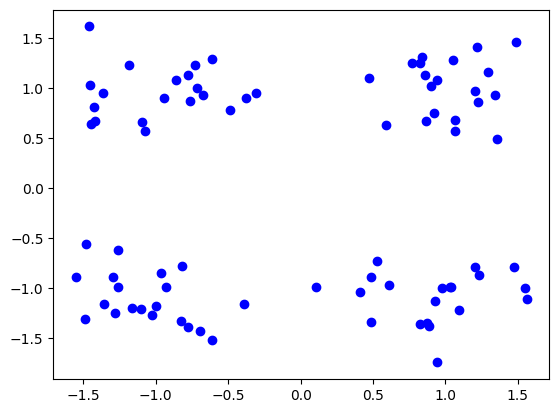

In [11]:
import matplotlib.pyplot as plt

# 시각화
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y): # zip -> 같은 크기의 연속된 리스트를 같이 반복시켜줄 수 있는 기능
        # 같은 번의 x, y 배열의 원소들 x_, y_
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else: # x_[0] x좌표(가로), x_[1] y좌표(세로)
            # c+'o' if y_ == 0 else c+'+'
            # y_ == 0 이라면 c에다가 이어서 점을 의미하는 'o' 붙여달라
            # 아니면 (y_ == 1) c... + 모양을 의미하는 '+' 붙여라
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
# vis_data(x_train, y_train, c='r')
vis_data(x_train, y_train, c='b')
plt.show()

In [13]:
# 벡터 → 텐서
import torch

# Numpy 배열 -> torch Tensor
x_train = torch.FloatTensor(x_train)
print(x_train.shape)

torch.Size([80, 2])


In [14]:
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [16]:
# 신경망 모델을 구현
# 파이토치에서는 신경망을 클래스 구현
# 파이토치 -> 모듈. 이미 기본적인 설계도를 구현
# torch.nn.Module -> 상속
# class 이름:
    # ...
class NeuralNet:
  def helloworld(self):  # 클래스에 들어갈 기능(self, ...):
      print("hello my name is neural net")

nn = NeuralNet() # 클래스이름(...?) -> 생성자 -> 특정한 변수에 클래스를 통해서 생성된 객체를 할당
nn.helloworld()# 클래스가 가진 기능(메소드), 특성 또는 변수 (프로퍼티)

hello my name is neural net


In [19]:
class Glory:
    def __init__(self) : #자동호출
        self.name = "연진"
    def say(self):
        print(f"{self.name}아 나 지금 신나")

a = Glory()
a.say()
a.name

연진아 나 지금 신나


'연진'

In [22]:
class GloryPt2:
    def __init__(self, name): # 자동호출
        self.name = name
    def say(self):
        print(f"{self.name}아 나 지금 신나")

b = GloryPt2("동은")
b.say()
b.name

동은아 나 지금 신나


'동은'

In [23]:
# 상속하고 싶은 클래스를 옆에 괄호에 넣어줌
class GloryPt3(GloryPt2):
    pass

c = GloryPt3("스튜디어스혜정")
c.say()
c.name

스튜디어스혜정아 나 지금 신나


'스튜디어스혜정'

## 신경망 모델 구현

In [25]:
# torch.nn.Module -> 상속 : 이미 구현된 클래스의 기능과 속성을 사용하는 것
class NeuralNet(torch.nn.Module): # torch.nn.Module : 부모 클래스 / NeuralNet : 자식 클래스
    # 생성자 __init__
    # 신경망의 구조와 동작을 (부여, 결정) 정의하는 생성자를 모델 클래스(NeuralNet)에 정의(기록)
    # __init__() : 파이썬에서 객체가 갖는 속성값을 초기화하는 역할
    # 초기화 (initialization) : 할당된 자리에 값을 채워줌 / 어떤 값을 대입해 줌
    # 정의 (definition) : (변수등의) 자리를 만들어 줌
    # __init__ -> 객체가 생성되면 자동으로 호출(실행)됨
    def __init__(self, input_size, hidden_size): # 입력층과 은닉층의 사이즈를 초기화 시 결정
        # 이미 정의된 nn.Module 활용해서 모델을 구성
        # super.__init__() # 생성자를 super를 통해 직접 실행해서 부모 클래스의 생성자를 작동시킴
        super(NeuralNet, self).__init__()
        # super() 함수를 부르면 nn.Module(부모 클래스)의 속성들을 가지고 초기화
        # ---
        # 객체를 만들 때 input_size, hidden_size 입력
        # input_size : 입력층 차원, hidden_size : 은닉층 차원
        # self는 생성될 객체 그 자체를 의미
        self.input_size = input_size
        # self -> input_size 속성이 생성 -> __init__ 전달받은 input_size가 부여
        self.hidden_size = hidden_size
        # self -> hidden_size 속성이 생성 -> __init__ 전달받은 hidden_size가 부여

        # 인공 신경망 연산 정의 (층을 이동할 때 어떠한 계산이 일어날지)
        # nn.Linear - 선형 결합, 행렬곱(가중치)과 편향(bias)를 포함하는 연산
        # 입력층 -> 입력을 받아서 은닉층으로 넘겨줄 것
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        # 들어올 크기 -> 나갈 크기
        self.relu = torch.nn.ReLU() # 활성화 함수
        # linear_1 층을 통해서 -> 가중치 계산 -> relu 필터링 (0보다 작으면 0, 그보다 크면 그대로)
        # 은닉층 -> 출력
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        # 이진분류 -> linear_1의 결과물을 받아서 -> 1개의 출력을 몰아줌 (0, 1)
        self.sigmoid = torch.nn.Sigmoid() # 활성화 함수
        # linear_1, relu, ... -> 함수처럼 쓰임
    
    # 가중치를 통해서 입력받은 값들을 변환하는 작업 : 순전파
    def forward(self, input_tensor): # 학습에 쓰일 텐서 (데이터)
        # init() 함수에서 정의된 동작들을 차례로 실행
        # linear1 : 입력 데이터 (input_tensor)에 [input_size, hidden_size] 크기의 가중치를 행렬 곱
        # 편향을 더해서 [1, hidden_size] 의 텐서를 반환
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1) # [1, hidden_size]
        # linear2 : [1, 1] 모양으로 변환
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

### ReLU
* ReLU : 입력값이 0보다 작으면 0을, 0보다 크면 입력값을 그대로 출력
![ReLU](https://github.com/BigData23th/Data/raw/main/dl_01_05.jpg)

### 시그모이드 sigmoid
* 0과 1 사이의 값을 반환
* 데이터를 0과 1 사이의 임의의 수로 제한해주어 결괏값이 0이나 1 중에 어디에 가까운지 알 수 있음
![sigmoid](https://github.com/BigData23th/Data/raw/main/dl_01_06.jpg)

# 모델링 진행

In [42]:
x_train.shape # 행 80, 열 2 -> 행은 데이터 하나 하나를 의미 -> [x좌표, y좌표]

torch.Size([80, 2])

In [43]:
# 신경망 객체를 생성
model = NeuralNet(2, 5) # 입력층 레이어 2, 은닉층 레이어 5

In [44]:
# 학습 관련 변수와 알고리즘 정의
learning_rate = 0.03 # 학습률 설정
# 평가함수? 오차함수? 손실함수? -> 예측값(모델의 결과) vs 실제값(라벨링, 정답값)
criterion = torch.nn.BCELoss() # 이진교차 엔트로피 (binary cross entropy) # 분류, 회귀...

In [45]:
# 에포크(이폭, epoch) : 전체 학습 데이터를 총 몇 번 모델에 입력할지 결정
epochs = 2000
# 너무 작게 설정하면 모델이 충분히 학습되지 않을 수 있음                (언더피팅, 과소적합)
# 너무 크게 설정하면 모델 학습이 오래 걸리고, 새로운 데이터에 적응 못함 (오버피팅, 과적합)

In [46]:
# 학습에 사용할 최적화 알고리즘 결정
# 확률적 경사하강법 stochastic gradient descent (SGD)
# 새 가중치 = 가중치 - 학습률 x 가중치에 대한 기울기
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
# optimizer.step() 함수를 호출할 때마다 가중치를 학습률만큼 갱신
# model.parameters() 함수로 모델 내부의 가중치를 추출 -> 가중치, 학습률

In [47]:
# 아무 학습도 안 한 모델의 성능 시험
model.eval() # evaluate (nn.Module) -> 시험모드로 설정
# 임의의 가중치
# 모델의 결과값과 레이블값(정답값)의 차원을 맞추기 위해 squeeze() -> 오차 구하기
y_pred = model(x_test)
y_pred

tensor([[0.5515],
        [0.6592],
        [0.6460],
        [0.5500],
        [0.5910],
        [0.6776],
        [0.7224],
        [0.7119],
        [0.6479],
        [0.5016],
        [0.7090],
        [0.5875],
        [0.7129],
        [0.6330],
        [0.5719],
        [0.6614],
        [0.6807],
        [0.6640],
        [0.6182],
        [0.7373]], grad_fn=<SigmoidBackward0>)

In [49]:
y_test, y_test.shape

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 torch.Size([20]))

In [50]:
test_loss_before = criterion(y_pred.squeeze(), y_test)

In [51]:
print(f'학습 전 loss는 {test_loss_before.item()}')

학습 전 loss는 1.0420618057250977


## 학습을 통한 성능 개선

In [52]:
for epoch in range(epochs): # 2000번 돌리기
    # 학습 모드로 전환
    model.train()
    
    # 한 번 반복해주는 에포크마다, 새로운 경사값을 계산할 것이므로
    # zero_grad() 함수를 호출해서 경사값(기울기)을 0으로 설정
    optimizer.zero_grad() # 그 전 기울기가 저장이 되어 있으므로 reset
    # 학습 데이터를 입력해서 결과값을 개선
    train_output = model(x_train) # x_train을 넣었을 때의 결과물
    # nn.module -> 알아서 forward()를 호출해줌
    
    # 결과값의 차원과 레이블의 차원을 같게 만들고 오차를 계산
    # loss_function
    train_loss = criterion(train_output.squeeze(), y_train) # x_train -> 모델을 통해 나온 예측값 vs 실제 정답값 비교
    
    # 100 에포크마다 오차를 출력해서 학습이 잘 되는지 확인 
    if epoch % 100 == 0:
        print(f"train loss at {epoch} : {train_loss.item()}")
    
    # 오차함수(손실함수)를 가중치로 미분하여 오차가 최소가 되는 방향을 구하고,
    # 그 방향으로 모델을 학습률만큼 이동시킴 (오차 역전파)
    train_loss.backward()
    optimizer.step() # optimizer.step() 함수를 호출할 때마다 가중치를 학습률만큼 갱신

train loss at 0 : 1.0459282398223877
train loss at 100 : 0.26771628856658936
train loss at 200 : 0.11954014003276825
train loss at 300 : 0.06777527183294296
train loss at 400 : 0.04416868835687637
train loss at 500 : 0.031474851071834564
train loss at 600 : 0.023854676634073257
train loss at 700 : 0.01888468489050865
train loss at 800 : 0.01544423121958971
train loss at 900 : 0.012948805466294289
train loss at 1000 : 0.011074701324105263
train loss at 1100 : 0.009625047445297241
train loss at 1200 : 0.00847101490944624
train loss at 1300 : 0.007535276003181934
train loss at 1400 : 0.006764799356460571
train loss at 1500 : 0.006120739039033651
train loss at 1600 : 0.00557685736566782
train loss at 1700 : 0.005112954881042242
train loss at 1800 : 0.004713341593742371
train loss at 1900 : 0.004365918226540089


## 학습 후 성능 측정

In [56]:
# 평가 모드로 바꾸기 + 테스트 데이터인 x_test & y_test를 통해 오차 구해보기
model.eval() # evaluate
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print(f'학습 후 loss는 {test_loss.item()}')

학습 후 loss는 0.004755956120789051


In [58]:
model(x_test), y_test

(tensor([[0.0017],
         [0.0051],
         [0.0075],
         [0.0034],
         [0.0054],
         [0.0026],
         [0.0052],
         [0.0069],
         [0.0047],
         [0.0013],
         [0.0077],
         [0.0060],
         [0.0075],
         [0.0036],
         [0.0037],
         [0.0048],
         [0.0049],
         [0.0044],
         [0.0049],
         [0.0036]], grad_fn=<SigmoidBackward0>),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [59]:
model.state_dict()

OrderedDict([('linear_1.weight',
              tensor([[-0.2402, -0.8537],
                      [-1.0161,  0.6118],
                      [ 0.7496, -0.4484],
                      [-0.7684, -0.4637],
                      [-0.0156,  1.3311]])),
             ('linear_1.bias',
              tensor([ 0.8345,  0.0099,  0.5365, -0.3060,  0.5397])),
             ('linear_2.weight',
              tensor([[-1.1034, -0.7707, -0.8486, -0.6084, -1.2326]])),
             ('linear_2.bias', tensor([-2.2490]))])

In [60]:
# 모델을 저장 -> 딥러닝에서 모델을 저장 -> 레이어마다의 가중치를 저장
# model.state_dict() : 모델 내의 가중치들을 딕셔너리 형태
# {연산 이름: 가중치 텐서와 편향 텐서}와 같이 표현된 데이터
torch.save(model.state_dict(), './model.pt') #.pth

In [61]:
from google.colab import files

files.download('./model.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
# 사용하려고 하는 모델 자체는 직접 구현 (Class 선언)
new_model = NeuralNet(2,5)# 아까 만든 model과는 다른 객체
# .load_state_dict -> 이미 학습된 모델의 가중치를 적용
new_model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

In [64]:
new_model.eval()
new_model(torch.FloatTensor([-1,1])).item() # 벡터 [-1,1] -> 레이블 1이 될 확률

0.002282526344060898

In [65]:
new_model(torch.FloatTensor([1,1])).item() # 벡터 [1,1] -> 레이블 1이 될 확률

0.005237661302089691